In [1]:
from datasets import load_dataset
import random

/Users/madkerpe/Projects/diy-ontology/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
simple_wikipedia_ds = load_dataset("wikipedia", "20220301.simple")["train"]
simple_wikipedia_ds = simple_wikipedia_ds.shuffle(seed=42)

/Users/madkerpe/Projects/diy-ontology/.venv/lib/python3.11/site-packages/datasets/load.py:1486: FutureWarning: The repository for wikipedia contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/wikipedia
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [3]:
country_surface_forms = {
    "China": ["China", "PRC", "Mainland China"],
    "India": ["India", "Bharat"],
    "United States": ["United States", "USA", "U.S.", "America"],
    "Indonesia": ["Indonesia"],
    "Switserland": ["Switserland", "Switzerland"],
    "Pakistan": ["Pakistan"],
    "Nigeria": ["Nigeria"],
    "Brazil": ["Brazil"],
    "Bangladesh": ["Bangladesh"],
    "Russia": ["Russia", "Russian Federation"],
    "Mexico": ["Mexico"],
    "Japan": ["Japan", "Nippon", "Nihon"],
    "Ethiopia": ["Ethiopia"],
    "Philippines": ["Philippines"],
    "Egypt": ["Egypt"],
    "Vietnam": ["Vietnam"],
    "DR Congo": ["DR Congo", "Congo-Kinshasa", "DRC"],
    "Turkey": ["Turkey"],
    "Iran": ["Iran"],
    "Germany": ["Germany", "Deutschland"],
    "Thailand": ["Thailand"],
    "United Kingdom": ["United Kingdom", "UK", "U.K.", "Britain", "Great Britain"],
    "France": ["France"],
    "Italy": ["Italy"],
    "Tanzania": ["Tanzania"],
    "South Africa": ["South Africa"],
    "Myanmar": ["Myanmar", "Burma"],
    "Kenya": ["Kenya"],
    "South Korea": ["South Korea", "Korea", "ROK"],
    "Colombia": ["Colombia"],
    "Spain": ["Spain"],
    "Uganda": ["Uganda"],
    "Argentina": ["Argentina"],
    "Algeria": ["Algeria"],
    "Sudan": ["Sudan"],
    "Ukraine": ["Ukraine"],
    "Iraq": ["Iraq"],
    "Afghanistan": ["Afghanistan"],
    "Poland": ["Poland"],
    "Canada": ["Canada"],
    "Morocco": ["Morocco"],
    "Saudi Arabia": ["Saudi Arabia"],
    "Uzbekistan": ["Uzbekistan"],
    "Peru": ["Peru"],
    "Angola": ["Angola"],
    "Malaysia": ["Malaysia"],
    "Mozambique": ["Mozambique"],
    "Ghana": ["Ghana"],
    "Yemen": ["Yemen"],
    "Nepal": ["Nepal"],
    "Venezuela": ["Venezuela"],
    "Belgium": ["Belgium"],
    "Austria": ["Austria"],
    "Sweden": ["Sweden"],
    "Finland": ["Finland"],
    "Norway": ["Norway"],
    "Denmark": ["Denmark"],
    "Iceland": ["Iceland"],
    "Netherlands": ["Netherlands"],
    "Ireland": ["Ireland"],
    "Greece": ["Greece"],
    "Portugal": ["Portugal"],
    "Romania": ["Romania"],
    "Luxembourg": ["Luxembourg"],
}

def country_detector(text):
    # Split text into sentences (simple split on periods)
    sentences = text.split('.')
    
    all_detected_countries = []
    
    # Process each sentence
    for sentence in sentences:
        sentence_countries = []
        sentence_lower = sentence.lower()
        
        # Look for countries in this sentence
        for country, forms in country_surface_forms.items():
            for form in forms:
                if form.lower() in sentence_lower:
                    sentence_countries.append(country)
                    break  # Stop checking other forms if one is found
        
        # Only add countries if we found multiple in this sentence
        if len(sentence_countries) > 1:
            all_detected_countries.extend(sentence_countries)
    
    return list(set(all_detected_countries))  # Remove any duplicates


In [4]:
def create_country_inventory(dataset, required_keywords=None):
    inventory = []
    N_SAMPLES = len(dataset)
    keywords = required_keywords if required_keywords is not None else []

    for i in range(N_SAMPLES):
        example = dataset[i]

        if keywords and not any(keyword in example["text"].lower() for keyword in keywords):
            continue
        detected_countries = country_detector(example["text"])
        if detected_countries:
            inventory.append(detected_countries)
    return inventory



#required_keywords=["war", "conflict", "battle", "fight", "combat", "struggle", "hostility", "violence", "attack", "invasion", "siege", "bombing"]
required_keywords=None

inventory = create_country_inventory(simple_wikipedia_ds, required_keywords=required_keywords)

In [5]:
inventory

[['United States', 'Venezuela'],
 ['India', 'United Kingdom'],
 ['Indonesia', 'China'],
 ['Russia',
  'Belgium',
  'Japan',
  'Afghanistan',
  'Egypt',
  'France',
  'Indonesia',
  'Thailand',
  'Spain',
  'Netherlands',
  'Uganda',
  'South Africa',
  'Yemen',
  'China',
  'Iraq',
  'Philippines',
  'India',
  'Iran',
  'Sudan',
  'United States',
  'Germany',
  'Ukraine',
  'Venezuela',
  'United Kingdom'],
 ['Peru', 'Argentina'],
 ['France', 'Ireland', 'United Kingdom'],
 ['United States', 'India', 'Japan'],
 ['Japan', 'United Kingdom'],
 ['France', 'Spain'],
 ['Brazil', 'Venezuela'],
 ['Russia', 'Ukraine', 'United Kingdom'],
 ['United States', 'Japan'],
 ['France', 'Spain'],
 ['United States', 'South Korea'],
 ['United States', 'Spain'],
 ['Japan', 'France'],
 ['United States', 'Japan'],
 ['France',
  'United States',
  'Netherlands',
  'Spain',
  'Denmark',
  'United Kingdom'],
 ['Norway', 'Iceland', 'Russia'],
 ['Germany', 'United Kingdom'],
 ['United States', 'Austria'],
 ['Unit

In [6]:
len(inventory)

24148

In [7]:
from coherence import InventoryCoherence

N_COMPONENTS = 30
IC = InventoryCoherence(inventory, n_components=N_COMPONENTS, shift_term=20)


In [8]:
random_entities = random.sample(list(country_surface_forms.keys()), 10)
print(random_entities)

['Belgium', 'Sudan', 'Saudi Arabia', 'Netherlands', 'Thailand', 'Peru', 'Indonesia', 'India', 'Uganda', 'Colombia']


In [9]:
# 5 African countries
african_countries = ["Nigeria", "Ethiopia", "Egypt", "Sudan", "Morocco"]

# 5 Asian countries
asian_countries = ["China", "India", "Pakistan", "Vietnam", "Afghanistan"]

# 5 European countries
european_countries = ["Germany", "United Kingdom", "Switserland", "France", "Russia", "Ukraine"]

# 5 North American countries
north_american_countries = ["United States", "Canada", "Mexico"]

# 5 South American countries
south_american_countries = ["Argentina", "Brazil", "Colombia"]




In [10]:
print("unique entities= ", len(IC.entity_count_dict.keys()))

unique entities=  64


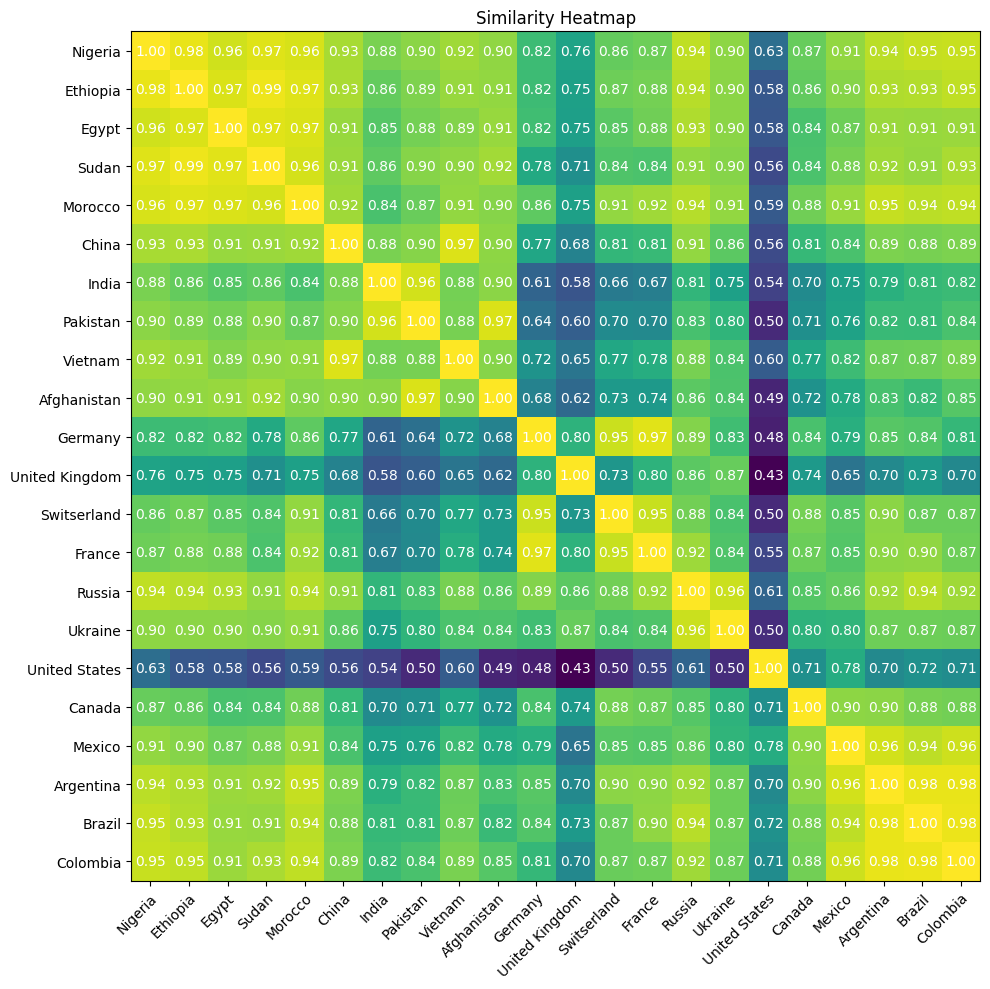

In [11]:
IC.plot_similarity_heatmap(african_countries + asian_countries + european_countries + north_american_countries + south_american_countries, figsize=10)

In [12]:
X_items = 25

#get the top X entities
top_entities_dict = {entity: count for entity, count in sorted(IC.entity_count_dict.items(), key=lambda item: item[1], reverse=True)[:X_items]}
print("top entities= ", top_entities_dict)

top_entities = list(top_entities_dict.keys())


top entities=  {'United States': 12104, 'United Kingdom': 8617, 'Japan': 4419, 'India': 4160, 'France': 3281, 'South Korea': 3043, 'Germany': 2691, 'Russia': 2589, 'Canada': 2568, 'China': 2043, 'Italy': 1641, 'Mexico': 1554, 'Spain': 1547, 'Austria': 1517, 'Brazil': 1470, 'Pakistan': 1345, 'Iran': 1272, 'Ireland': 1145, 'Ukraine': 987, 'Netherlands': 932, 'Sweden': 882, 'Poland': 858, 'Switserland': 846, 'Vietnam': 828, 'Egypt': 777}


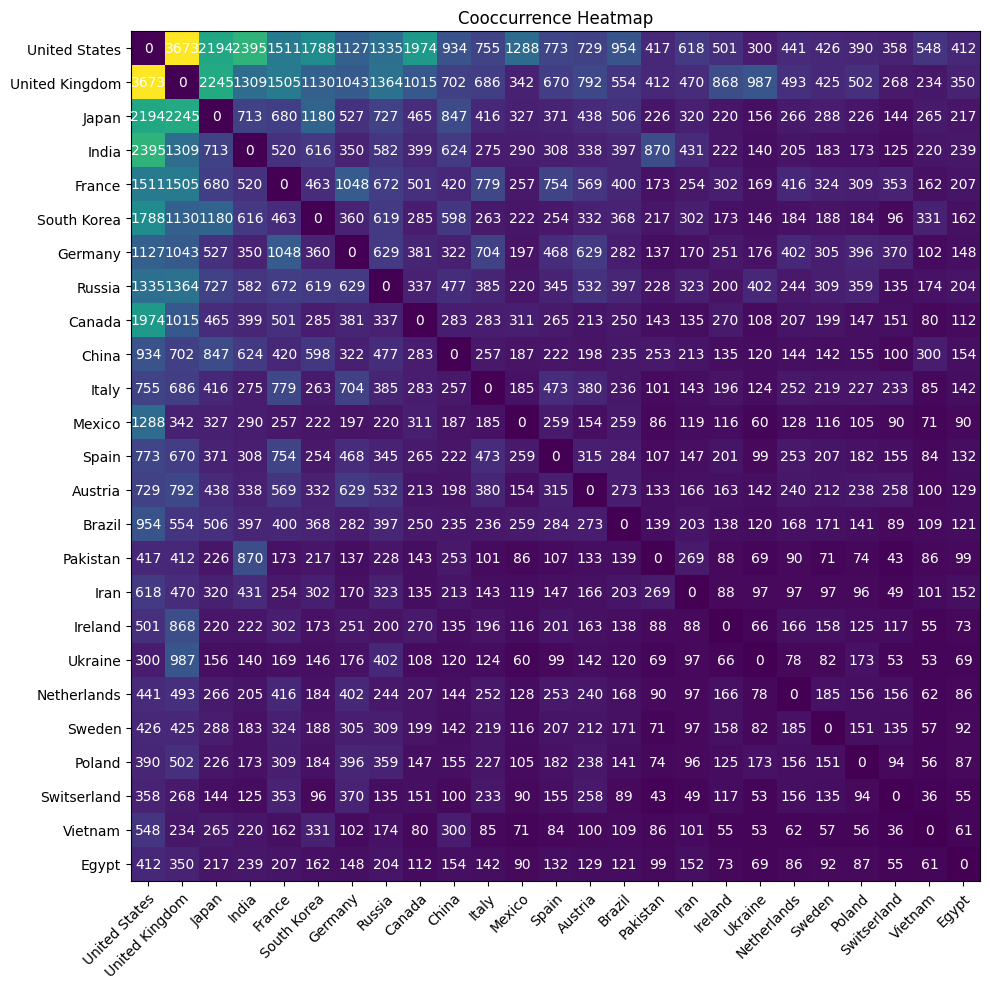

In [13]:
IC.plot_cooccurrence_heatmap(top_entities, figsize=10)


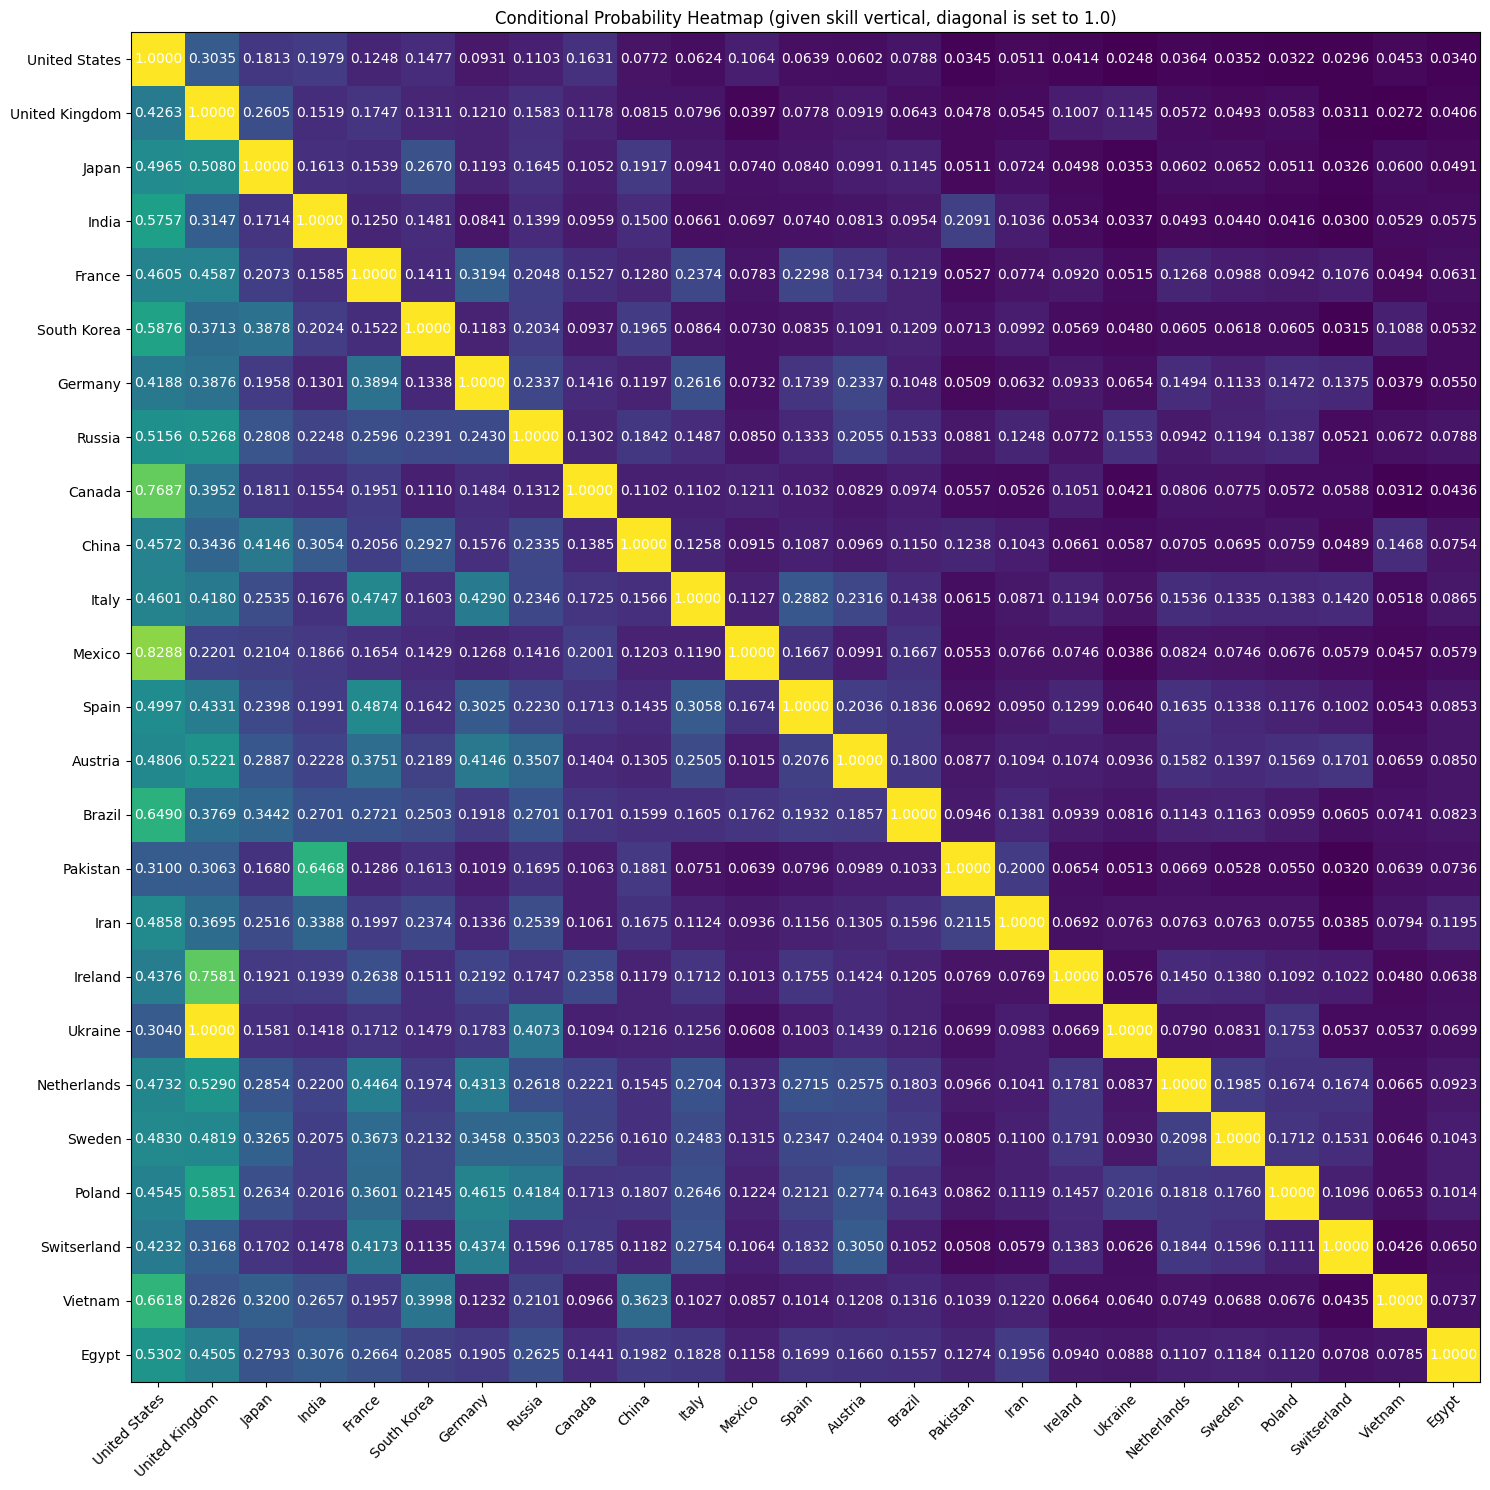

['United States',
 'United Kingdom',
 'Japan',
 'India',
 'France',
 'South Korea',
 'Germany',
 'Russia',
 'Canada',
 'China',
 'Italy',
 'Mexico',
 'Spain',
 'Austria',
 'Brazil',
 'Pakistan',
 'Iran',
 'Ireland',
 'Ukraine',
 'Netherlands',
 'Sweden',
 'Poland',
 'Switserland',
 'Vietnam',
 'Egypt']

In [14]:
IC.plot_conditional_probability_heatmap(top_entities, figsize=15)
top_entities


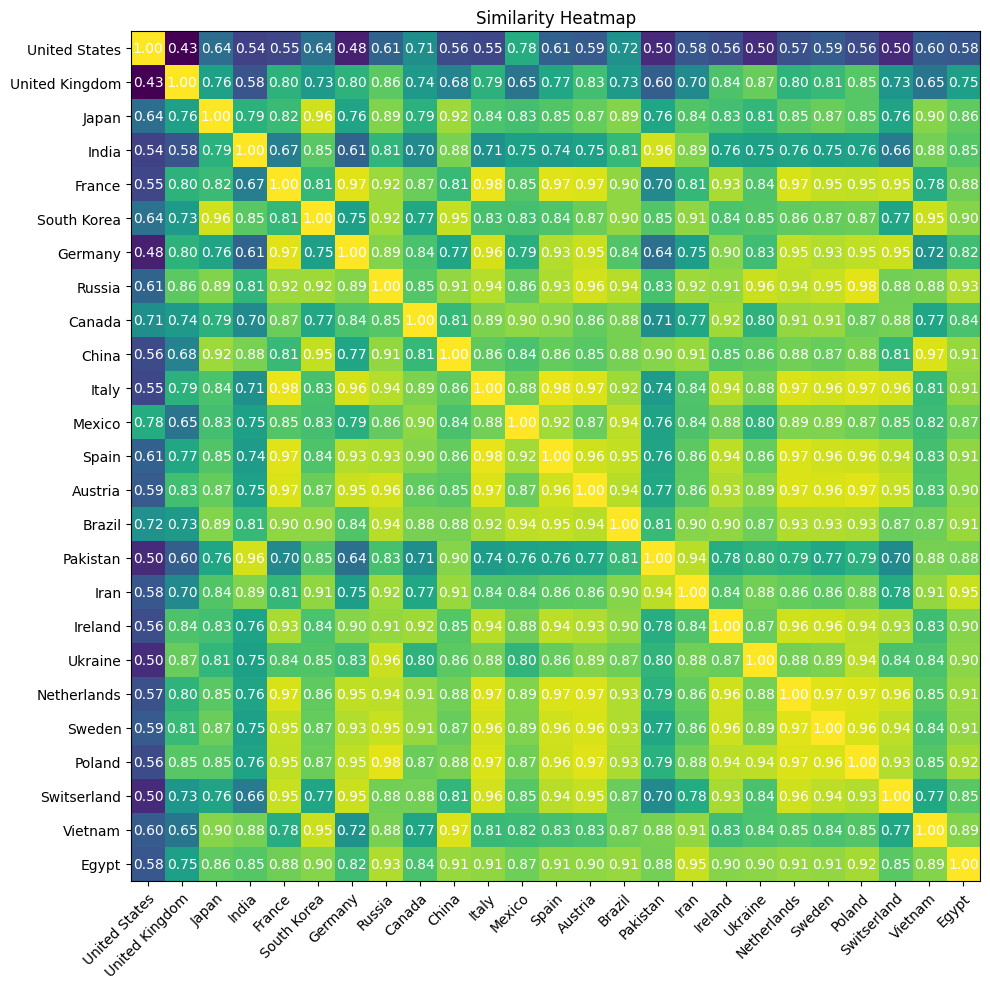

In [15]:
IC.plot_similarity_heatmap(top_entities, figsize=10)


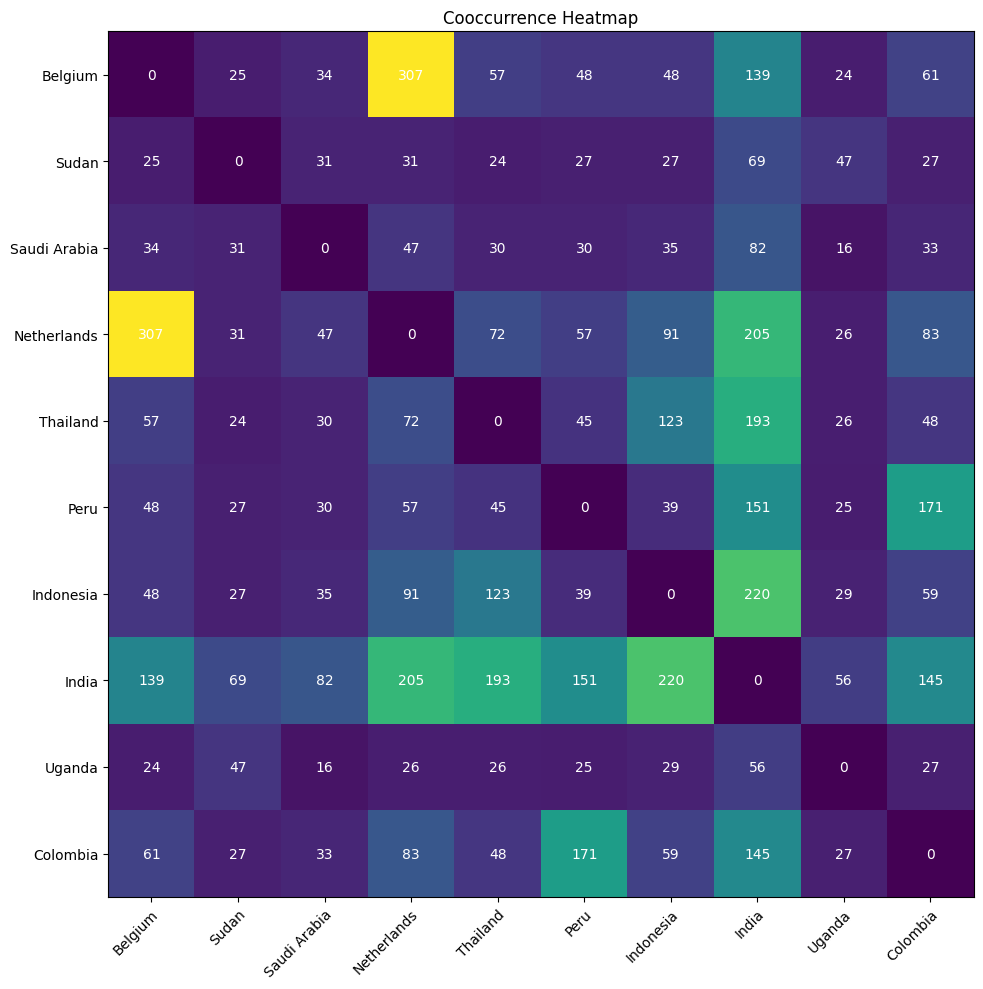

In [16]:
IC.plot_cooccurrence_heatmap(random_entities, figsize=10)


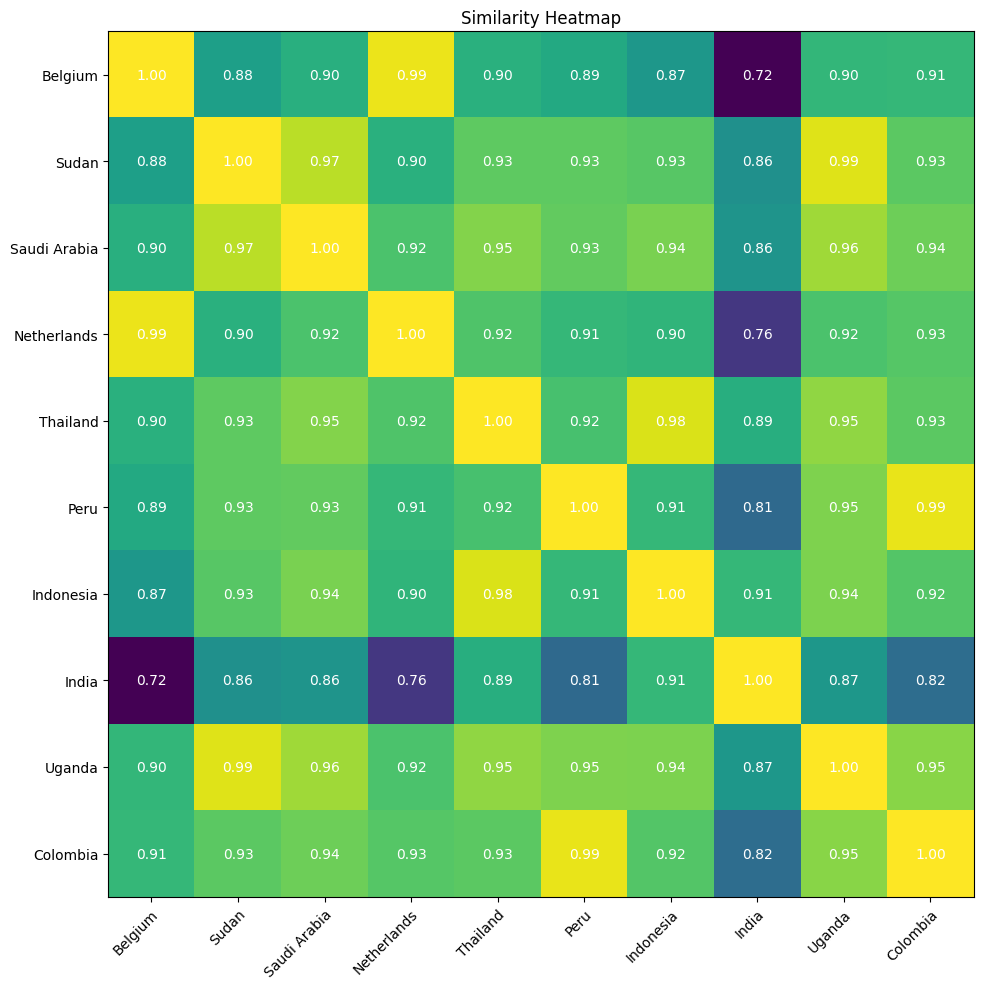

In [17]:
IC.plot_similarity_heatmap(random_entities, figsize=10)


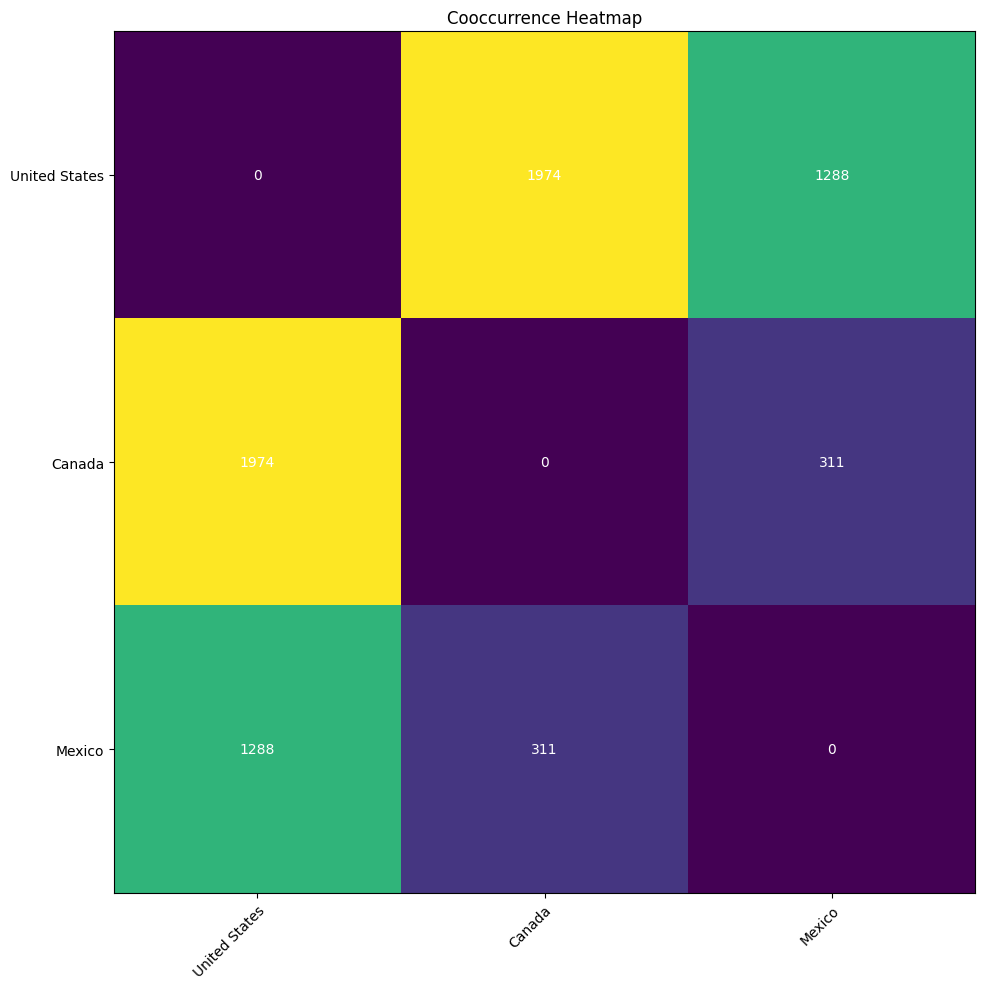

In [18]:
IC.plot_cooccurrence_heatmap(north_american_countries, figsize=10)

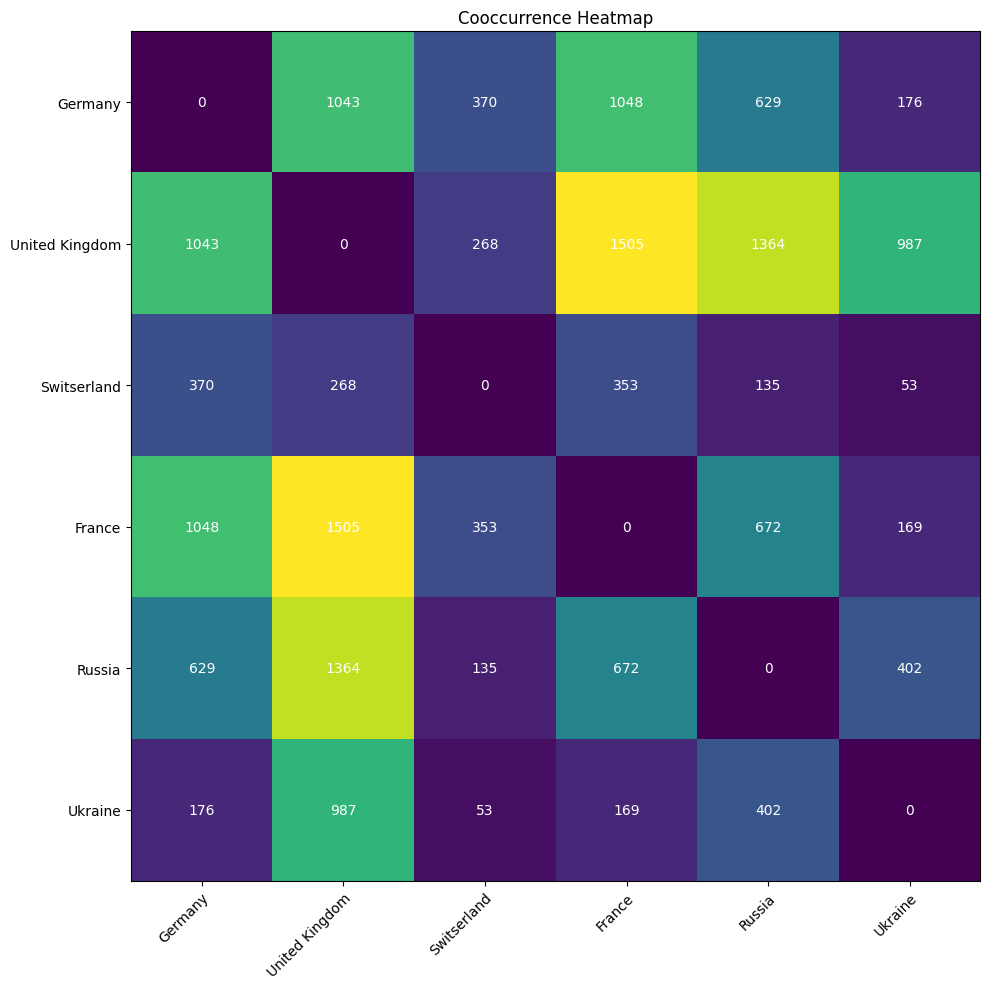

In [19]:
IC.plot_cooccurrence_heatmap(european_countries, figsize=10)

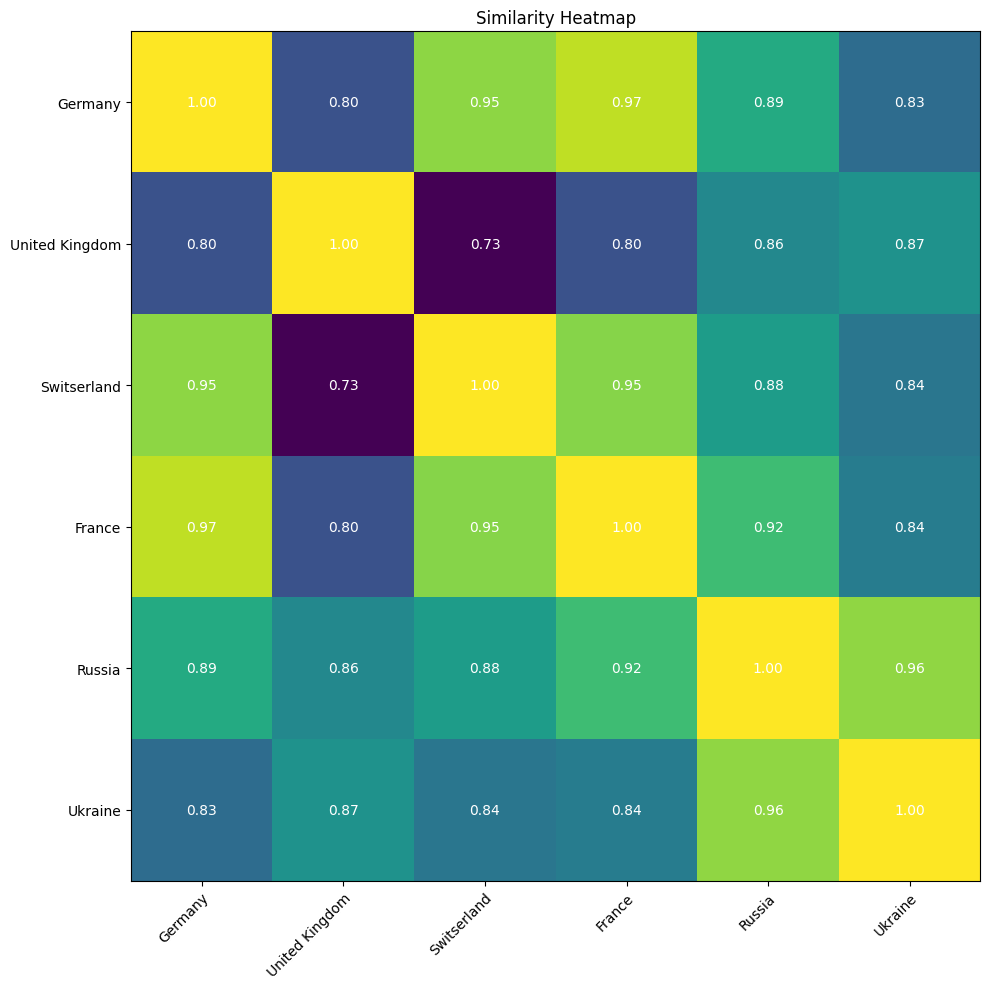

In [20]:
IC.plot_similarity_heatmap(european_countries, figsize=10)

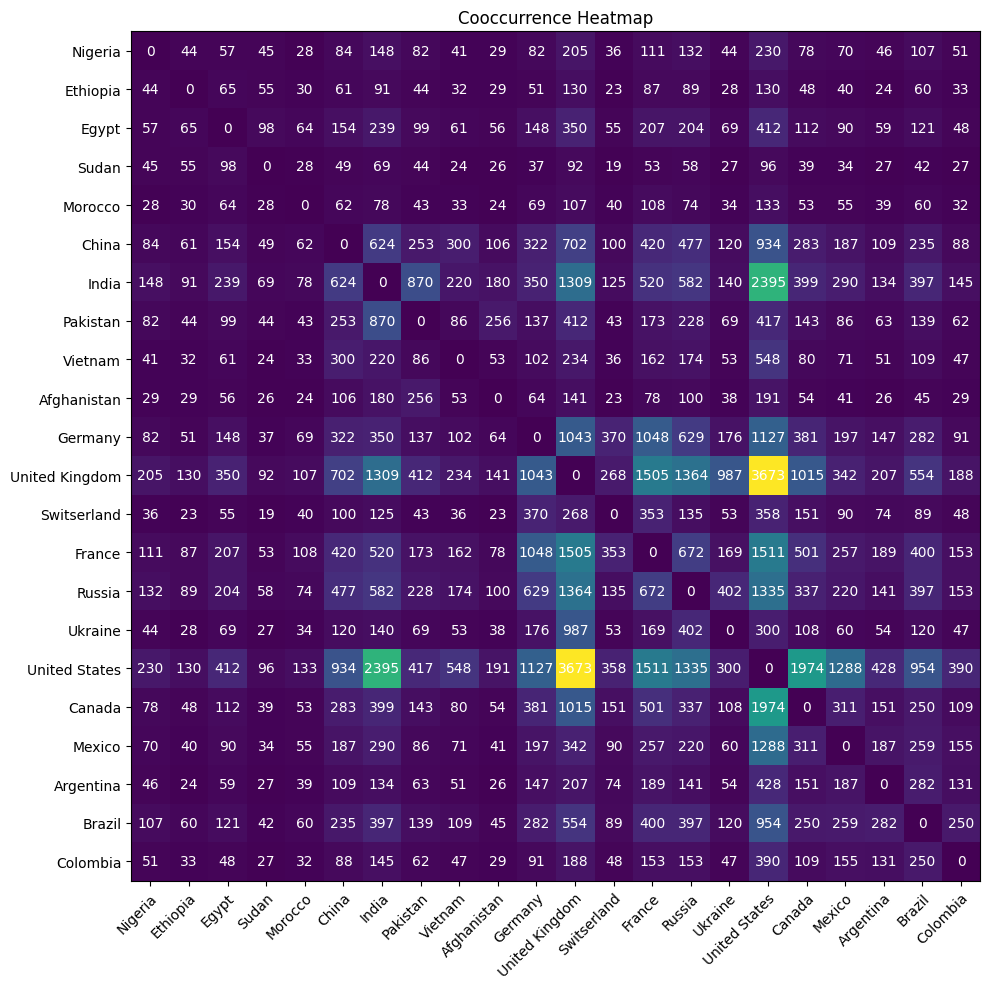

In [21]:
IC.plot_cooccurrence_heatmap(african_countries + asian_countries + european_countries + north_american_countries + south_american_countries, figsize=10)

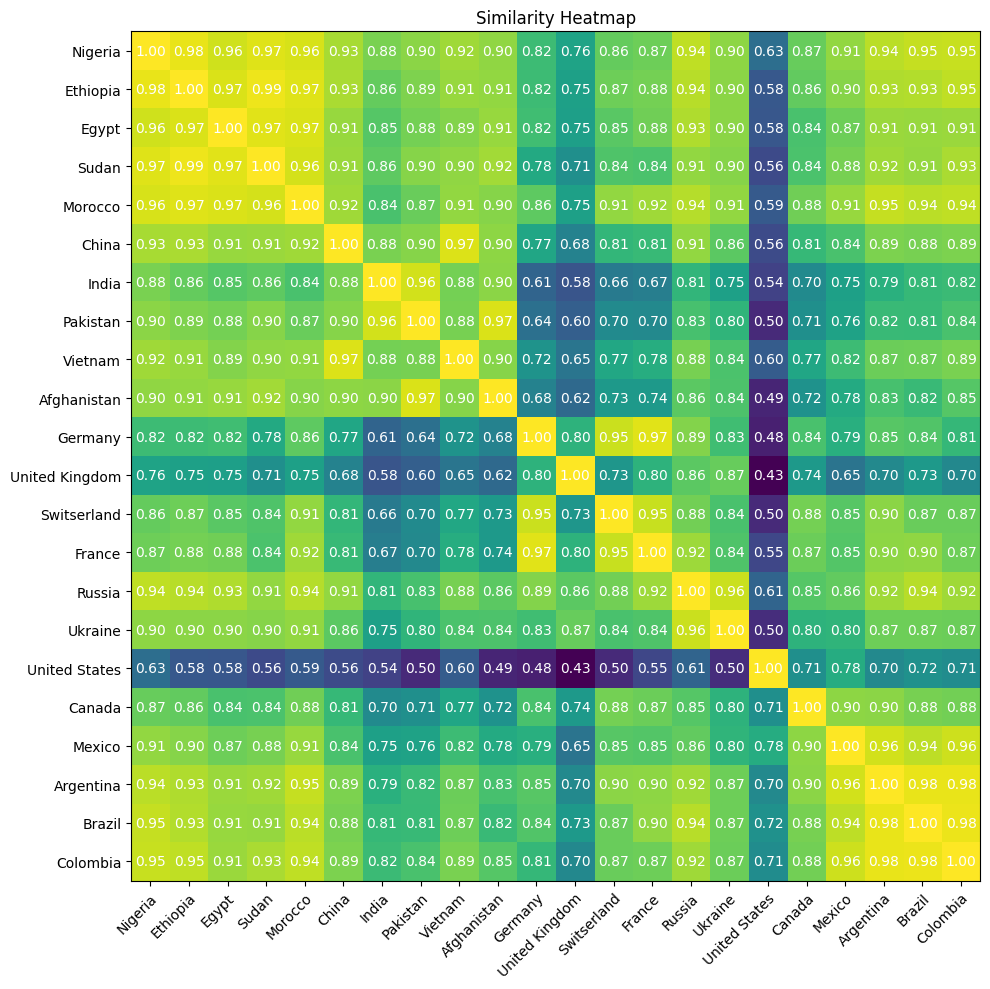

In [22]:
IC.plot_similarity_heatmap(african_countries + asian_countries + european_countries + north_american_countries + south_american_countries, figsize=10)

In [23]:
import numpy as np

def get_top_matches(reference_entity, candidate_entities, top_k=10):
    # Retrieve embeddings for the reference entity and candidate entities
    reference_embedding = IC.get_embeddings([reference_entity]).reshape(-1)
    candidate_embeddings = IC.get_embeddings(candidate_entities).reshape(-1, N_COMPONENTS)

    # Compute the cosine similarity between the reference and each candidate
    dot_products = np.dot(candidate_embeddings, reference_embedding)
    reference_norm = np.linalg.norm(reference_embedding)
    candidate_norms = np.linalg.norm(candidate_embeddings, axis=1)
    cosine_similarities = dot_products / (reference_norm * candidate_norms)

    # Get the top k indices with the highest cosine similarity scores
    top_k_indices = np.argsort(-cosine_similarities)[:top_k]

    # Return the top k candidate entities based on these indices
    top_matches = [candidate_entities[i] for i in top_k_indices]
    return top_matches

In [24]:
candidate_entities = list(country_surface_forms.keys())
get_top_matches("United States", candidate_entities)

['United States',
 'Mexico',
 'Brazil',
 'Canada',
 'Venezuela',
 'Colombia',
 'Argentina',
 'Peru',
 'Iceland',
 'South Africa']

In [25]:
candidate_entities = list(country_surface_forms.keys())
get_top_matches("Brazil", candidate_entities)

['Brazil',
 'Colombia',
 'Argentina',
 'Venezuela',
 'Peru',
 'Iceland',
 'South Africa',
 'Romania',
 'Portugal',
 'Ghana']

In [26]:
candidate_entities = list(country_surface_forms.keys())
get_top_matches("Belgium", candidate_entities)

['Belgium',
 'Netherlands',
 'Luxembourg',
 'Denmark',
 'France',
 'Switserland',
 'Italy',
 'Finland',
 'Norway',
 'Portugal']

In [27]:
candidate_entities = list(country_surface_forms.keys())
get_top_matches("Germany", candidate_entities)

['Germany',
 'France',
 'Italy',
 'Austria',
 'Switserland',
 'Belgium',
 'Netherlands',
 'Poland',
 'Sweden',
 'Spain']

In [28]:
candidate_entities = list(country_surface_forms.keys())
get_top_matches("Switserland", candidate_entities)

['Switserland',
 'Belgium',
 'Italy',
 'Netherlands',
 'Germany',
 'France',
 'Austria',
 'Denmark',
 'Luxembourg',
 'Finland']

In [29]:
candidate_entities = list(country_surface_forms.keys())
get_top_matches("Ghana", candidate_entities)

['Ghana',
 'Nigeria',
 'Kenya',
 'Ethiopia',
 'Uganda',
 'Tanzania',
 'South Africa',
 'Mozambique',
 'Angola',
 'Algeria']

In [30]:
candidate_entities = list(country_surface_forms.keys())
get_top_matches("United Kingdom", candidate_entities)

['United Kingdom',
 'Ukraine',
 'Russia',
 'Poland',
 'Ireland',
 'Austria',
 'Iceland',
 'Romania',
 'Sweden',
 'Denmark']

In [31]:
candidate_entities = list(country_surface_forms.keys())
get_top_matches("France", candidate_entities)

['France',
 'Italy',
 'Germany',
 'Spain',
 'Austria',
 'Belgium',
 'Netherlands',
 'Portugal',
 'Denmark',
 'Switserland']

In [32]:
candidate_entities = list(country_surface_forms.keys())
get_top_matches("India", candidate_entities)

['India',
 'Bangladesh',
 'Pakistan',
 'Nepal',
 'Myanmar',
 'Indonesia',
 'Afghanistan',
 'Malaysia',
 'Thailand',
 'Iran']

In [33]:
candidate_entities = list(country_surface_forms.keys())
get_top_matches("China", candidate_entities)

['China',
 'Thailand',
 'Vietnam',
 'Philippines',
 'Malaysia',
 'Myanmar',
 'Indonesia',
 'Nepal',
 'Uzbekistan',
 'South Korea']

In [34]:
candidate_entities = list(country_surface_forms.keys())
get_top_matches("United States", candidate_entities)

['United States',
 'Mexico',
 'Brazil',
 'Canada',
 'Venezuela',
 'Colombia',
 'Argentina',
 'Peru',
 'Iceland',
 'South Africa']

In [67]:
distance_matrix_between_countries = IC.conditional_probability_matrix
countries = list(country_surface_forms.keys())

european_countries = [
    'Switserland',
    'Russia',  # Partly in Europe
    'Germany',
    'United Kingdom',
    'France',
    'Italy',
    'Spain',
    'Ukraine',
    'Poland',
    'Belgium',
    'Austria',
    'Sweden',
    'Finland',
    'Norway',
    'Denmark',
    'Iceland',
    'Netherlands',
    'Ireland',
    'Greece',
    'Portugal',
    'Romania',
    'Luxembourg'
]



In [85]:
import json
import numpy as np

# Get the distance matrix and create graph data only for top entities
distance_matrix_between_countries = IC.conditional_probability_matrix
top_entities_indices = [countries.index(country) for country in european_countries]
filtered_distance_matrix = distance_matrix_between_countries[np.ix_(top_entities_indices, top_entities_indices)]

# Create nodes
nodes = [{"id": country} for country in european_countries]

# Create links
links = []
for i in range(len(european_countries)):
    for j in range(i+1, len(european_countries)):  # Avoid duplicate pairs and self-links
        distance = filtered_distance_matrix[i, j]
        if distance > 0.1:  # Only add links with distance > 0.2
            links.append({
                "source": european_countries[i],
                "target": european_countries[j],
                "distance": distance
            })

# Combine into a single dictionary
graph_data = {
    "nodes": nodes,
    "links": links
}

# Save to JSON file
with open('./worldview/graph_data.json', 'w') as f:
    json.dump(graph_data, f, indent=4)

print("Data saved to graph_data.json")

Data saved to graph_data.json


In [72]:
graph_data

{'nodes': [{'id': 'United States'},
  {'id': 'United Kingdom'},
  {'id': 'Japan'},
  {'id': 'India'},
  {'id': 'France'},
  {'id': 'South Korea'},
  {'id': 'Germany'},
  {'id': 'Russia'},
  {'id': 'Canada'},
  {'id': 'China'},
  {'id': 'Italy'},
  {'id': 'Mexico'},
  {'id': 'Spain'},
  {'id': 'Austria'},
  {'id': 'Brazil'},
  {'id': 'Pakistan'},
  {'id': 'Iran'},
  {'id': 'Ireland'},
  {'id': 'Ukraine'},
  {'id': 'Netherlands'},
  {'id': 'Sweden'},
  {'id': 'Poland'},
  {'id': 'Switserland'},
  {'id': 'Vietnam'},
  {'id': 'Egypt'}],
 'links': [{'source': 'Switserland',
   'target': 'Germany',
   'distance': 0.2082616179001721},
  {'source': 'Switserland',
   'target': 'France',
   'distance': 0.1549053356282272},
  {'source': 'Switserland',
   'target': 'Ukraine',
   'distance': 0.17900172117039587},
  {'source': 'Switserland',
   'target': 'Poland',
   'distance': 0.10671256454388985},
  {'source': 'Switserland',
   'target': 'Sweden',
   'distance': 0.10154905335628227},
  {'source':

In [61]:
# IC.plot_conditional_probability_heatmap(top_entities, figsize=15)

In [64]:
candidate_entities


['China',
 'India',
 'United States',
 'Indonesia',
 'Switserland',
 'Pakistan',
 'Nigeria',
 'Brazil',
 'Bangladesh',
 'Russia',
 'Mexico',
 'Japan',
 'Ethiopia',
 'Philippines',
 'Egypt',
 'Vietnam',
 'DR Congo',
 'Turkey',
 'Iran',
 'Germany',
 'Thailand',
 'United Kingdom',
 'France',
 'Italy',
 'Tanzania',
 'South Africa',
 'Myanmar',
 'Kenya',
 'South Korea',
 'Colombia',
 'Spain',
 'Uganda',
 'Argentina',
 'Algeria',
 'Sudan',
 'Ukraine',
 'Iraq',
 'Afghanistan',
 'Poland',
 'Canada',
 'Morocco',
 'Saudi Arabia',
 'Uzbekistan',
 'Peru',
 'Angola',
 'Malaysia',
 'Mozambique',
 'Ghana',
 'Yemen',
 'Nepal',
 'Venezuela',
 'Belgium',
 'Austria',
 'Sweden',
 'Finland',
 'Norway',
 'Denmark',
 'Iceland',
 'Netherlands',
 'Ireland',
 'Greece',
 'Portugal',
 'Romania',
 'Luxembourg']